### FINAL PROJECT FOR STATICTICS FOR DATA SCIENCE WITH PYTHON

##### REQUIRED IMPORTS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#mpl.style.use('ggplot')  # optional: for ggplot-like style

import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline

sns.set_theme()

#### TASK 0: LOAD THE DATASET

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

boston_df.drop('Unnamed: 0', axis=1, inplace=True)

#### TASK 1: EXPLORE THE DATASET

In [3]:
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [4]:
boston_df.shape

(506, 13)

In [5]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
boston_df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


#### TASK 2: GENERATE DESCRIPTIVE STATISTICS AND VISUALIZATIONS

##### <b>TASK 2.a:</b> For the "Median value of owner-occupied homes" provide a boxplot

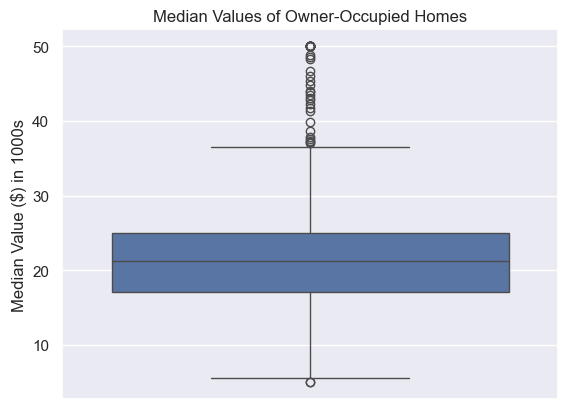

In [9]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.ylabel('Median Value ($) in 1000s')
plt.title("Median Values of Owner-Occupied Homes")
plt.show()

#### <b>TASK 2.b:</b> Provide a  bar plot for the Charles river variable

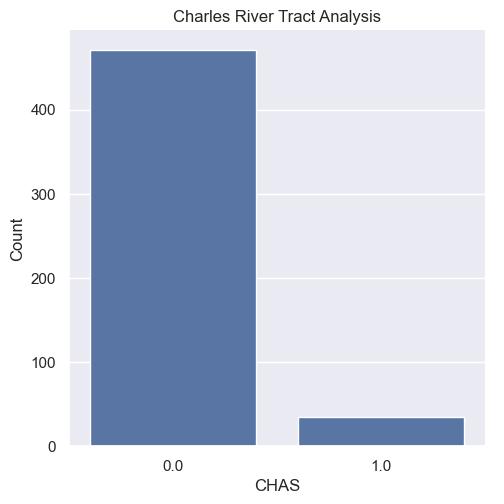

In [10]:
ax = sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.title('Charles River Tract Analysis')
plt.ylabel('Count')
plt.show()

#### <b>TASK 2.c:</b> Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [11]:
#DISCETIZING VARIABLE AGE TO AGE_GROUP BASED ON REQUEST

boston_df.loc[(boston_df['AGE']<=35), 'AGE_GROUP'] = '35 YEARS AND YOUNGER'
boston_df.loc[((boston_df['AGE']>35)&(boston_df['AGE']< 70)), 'AGE_GROUP'] = 'BETWEEN 35-70 YEARS'
boston_df.loc[(boston_df['AGE']>= 70), 'AGE_GROUP'] = '70 YEARS AND OLDER'

boston_df[['AGE','AGE_GROUP']].head(5)

,AGE,AGE_GROUP
0,65.2,BETWEEN 35-70 YEARS
1,78.9,70 YEARS AND OLDER
2,61.1,BETWEEN 35-70 YEARS
3,45.8,BETWEEN 35-70 YEARS
4,54.2,BETWEEN 35-70 YEARS


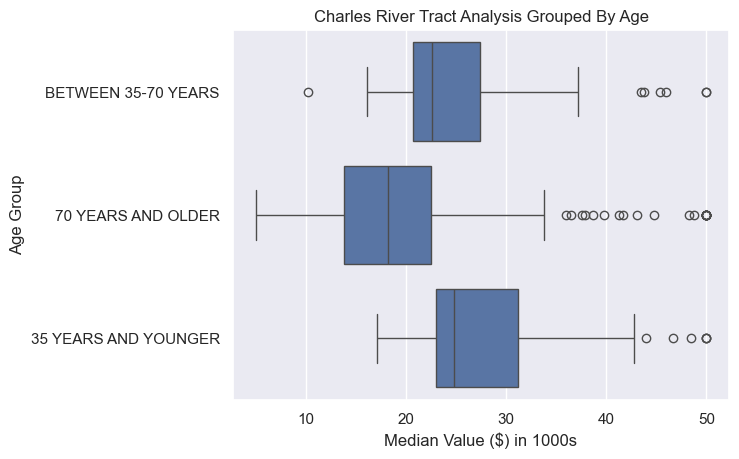

In [12]:
ax = sns.boxplot(y='AGE_GROUP', x='MEDV' , data=boston_df)
plt.title('Charles River Tract Analysis Grouped By Age')
plt.xlabel('Median Value ($) in 1000s')
plt.ylabel('Age Group')
plt.show()

#### <b>TASK 2.d:</b> Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

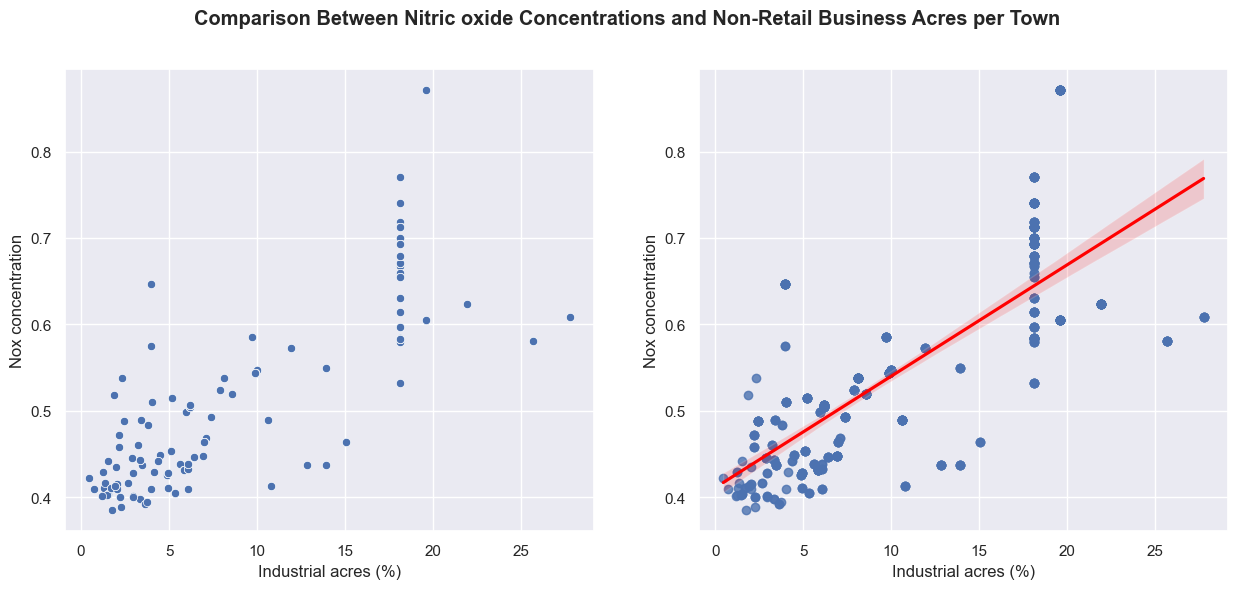

In [13]:
fig=plt.figure(figsize=(15,6))

fig.suptitle('Comparison Between Nitric oxide Concentrations and Non-Retail Business Acres per Town', fontweight='bold')

ax = fig.add_subplot(1, 2, 1)
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set_xlabel('Industrial acres (%)',fontsize=12)
ax.set_ylabel('Nox concentration', fontsize=12)

ax1 = fig.add_subplot(1, 2, 2)
ax1 = sns.regplot(x='INDUS', y='NOX', data=boston_df, line_kws={"color": "red"})
ax1.set_xlabel('Industrial acres (%)',fontsize=12)
ax1.set_ylabel('Nox concentration', fontsize=12)
plt.show()

##### THERE IS A POSITIVE CORRELATION BETWEEN NOX CONCENTRATION AND INDUSTRIAL ACRES AS SEEN IN THE RIGHT REGRESSION PLOT SHOWING THE RELATIONSHIP MODEL BETWEEN NOX AND INDUS

#### <b>TASK 2.e:</b> Create a histogram for the pupil to teacher ratio variable

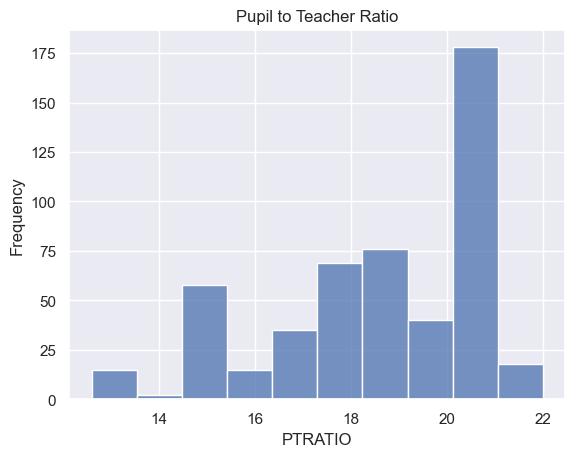

In [14]:
sns.histplot(data=boston_df, x='PTRATIO', bins=10)
plt.title("Pupil to Teacher Ratio")
plt.ylabel('Frequency')
plt.show()

IF WE WANT TO MAKE THE BIN EDGES LINE UP WITH THE HISTOGRAM BINS WE CAN DO THE FOLLOWING:

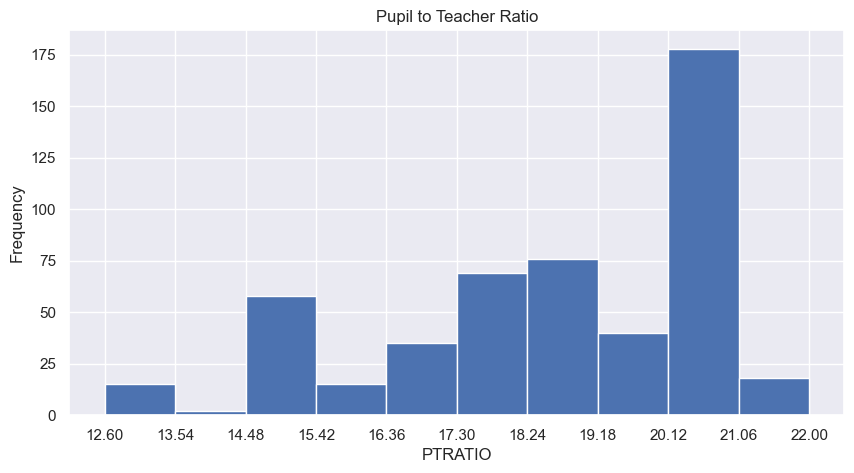

In [15]:

count, bin_edges = np.histogram(boston_df['PTRATIO'])
boston_df['PTRATIO'].plot(kind='hist', figsize=(10, 5), xticks=bin_edges)
plt.title("Pupil to Teacher Ratio")
plt.xlabel("PTRATIO")
plt.show()

##### <b>TASK 3a:</b> Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis:
* $H_0:$ (=) There is no difference between the mean house value of house values bound by the charles river and those that are not. They are equal.
* $H_1:$ (<>) There is a difference between the mean house value of houses bound by the charles river and thos that are noe. They are not equal.

In [16]:

stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion:** Since the p-value 7.390623170519905e-05 is less than alpha value 0.05, <b><u>we reject the null hypothesis </b></u> as there is enough proof that there is a statistical difference in median home values of houses that are bound by the charles river and those houses that are not bound by the charles river

##### <b>TASK 3b:</b> Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis:
* $H_0:$ (=) There is no difference between the mean house values based on the age of the house. They are equal.
* $H_1:$ (<>) There is a difference between the mean house values based on age of the house. They are not equal.

In [17]:
#AGE_GROUP WAS DEFINED EARLIER. LETS'S RE-USE IT FOR OUR ANOVA ANALYSIS

lte_35_medv = boston_df[boston_df['AGE_GROUP'] == '35 YEARS AND YOUNGER']['MEDV']
gt_35_lt_70_medv = boston_df[boston_df['AGE_GROUP'] == 'BETWEEN 35-70 YEARS']['MEDV']
gte_70_medv = boston_df[boston_df['AGE_GROUP'] == '70 YEARS AND OLDER']['MEDV']

In [18]:
stats.levene(lte_35_medv,
             gt_35_lt_70_medv,
             gte_70_medv,
             center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

<b>NOTE:</b> The p-value is greater than 0.05 so the variance are equal. We can continue with ANOVA analysis.

In [19]:
f_statistic, p_value = stats.f_oneway(lte_35_medv, gt_35_lt_70_medv, gte_70_medv)
print(f"F_Statistic: {f_statistic}, P-Value: {p_value}")

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value 1.7105011022702984e-15 is less than alpha value 0.05, <b><u>we reject the null hypothesis </b></u> as there is enough proof that there is a statistical difference in median home values of houses of different age groups. The mean values of at least 2 groups, are not equal.

##### <b>TASK 3c:</b> Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [20]:

stats.pearsonr(x=boston_df['NOX'], y=boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209158, pvalue=7.91336106123623e-98)

**Conclusion:** Since the p-value 7.91336106123623e-98 is less than alpha value 0.05, <b><u>we reject the null hypothesis </b></u> of the pearson correlation which states that there is <u>no</u> correlation. <b><u>Therefore....</b></u>

We can then say there is a strong positive correlation bewteen NOX and Industry Acerage. A small p-value and a high R value with a pearsonr correlation test indicates strong evidence of correlaction between the values. In this case a strong positive correlation.

So no we can't not conclude there is no relationship. We conclude there is a strong relationship between these variables.

##### <b>TASK 3d:</b> What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis:
* $H_0:$ (=) There is no difference between the mean of houses based on distance from the five boston employment centers.
* $H_1:$ (<>) There is a difference between the mean of houses based on distance from the five boston employment centers.

In [21]:
  
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X.to_numpy()) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        21:29:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
x1             1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value 1.21e-08 is less than alpha value 0.05, <b><u>we reject the null hypothesis </b></u> as there is enough proof that there is a statistical difference in median home values of houses that are different distances from the five boston employment centers